In [10]:
!uv add matplotlib

Resolved 123 packages in 388ms                                       
Prepared 7 packages in 416ms                                             
Installed 7 packages in 17ms                                
 + contourpy==1.3.3
 + cycler==0.12.1
 + fonttools==4.61.1
 + kiwisolver==1.4.9
 + matplotlib==3.10.8
 + pillow==12.1.0
 + pyparsing==3.3.1


In [11]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

df = pd.read_parquet(
    "gs://sec-financials-edgar/edgar_idx_files/dataframes/company_index.parquet",
    engine="pyarrow"
)

df.head()

,Company Name,Form Type,CIK,Date Filed,Filename,Year,Quarter,SourceFile
0,MERRILL LYNCH LIFE VARIABLE ANNUITY SEPARATE A...,NSAR-B,880794,1993-02-26,edgar/data/880794/9999999997-05-050433.txt,1993,QTR1,1993_QTR1_company.idx
1,RBS PARTNERS L P /CT,13FCONP,860585,1993-02-11,edgar/data/860585/9999999997-04-035713.txt,1993,QTR1,1993_QTR1_company.idx
2,SMITH THOMAS W,13F-HR,926688,1993-02-12,edgar/data/926688/9999999997-05-015654.txt,1993,QTR1,1993_QTR1_company.idx
3,STORAGE TECHNOLOGY CORP,CERTNYS,94673,1993-02-24,edgar/data/94673/9999999997-05-037760.txt,1993,QTR1,1993_QTR1_company.idx
4,RBS PARTNERS L P /CT,13FCONP,860585,1993-05-12,edgar/data/860585/9999999997-04-042068.txt,1993,QTR2,1993_QTR2_company.idx


In [2]:
#Data Cleaning to remove filings with no dates
# Remove rows where 'Date Filed' contains '------------'
df = df[df['Date Filed'] != '------------']

In [3]:
df.head()

,Company Name,Form Type,CIK,Date Filed,Filename,Year,Quarter,SourceFile
0,MERRILL LYNCH LIFE VARIABLE ANNUITY SEPARATE A...,NSAR-B,880794,1993-02-26,edgar/data/880794/9999999997-05-050433.txt,1993,QTR1,1993_QTR1_company.idx
1,RBS PARTNERS L P /CT,13FCONP,860585,1993-02-11,edgar/data/860585/9999999997-04-035713.txt,1993,QTR1,1993_QTR1_company.idx
2,SMITH THOMAS W,13F-HR,926688,1993-02-12,edgar/data/926688/9999999997-05-015654.txt,1993,QTR1,1993_QTR1_company.idx
3,STORAGE TECHNOLOGY CORP,CERTNYS,94673,1993-02-24,edgar/data/94673/9999999997-05-037760.txt,1993,QTR1,1993_QTR1_company.idx
4,RBS PARTNERS L P /CT,13FCONP,860585,1993-05-12,edgar/data/860585/9999999997-04-042068.txt,1993,QTR2,1993_QTR2_company.idx


In [4]:
# Convert 'Date Filed' to datetime if it's not already
df['Date Filed'] = pd.to_datetime(df['Date Filed'])

# Extract month and year from 'Date Filed'
df['Month'] = df['Date Filed'].dt.month
df['Year'] = df['Date Filed'].dt.year
df.head()

,Company Name,Form Type,CIK,Date Filed,Filename,Year,Quarter,SourceFile,Month
0,MERRILL LYNCH LIFE VARIABLE ANNUITY SEPARATE A...,NSAR-B,880794,1993-02-26,edgar/data/880794/9999999997-05-050433.txt,1993,QTR1,1993_QTR1_company.idx,2
1,RBS PARTNERS L P /CT,13FCONP,860585,1993-02-11,edgar/data/860585/9999999997-04-035713.txt,1993,QTR1,1993_QTR1_company.idx,2
2,SMITH THOMAS W,13F-HR,926688,1993-02-12,edgar/data/926688/9999999997-05-015654.txt,1993,QTR1,1993_QTR1_company.idx,2
3,STORAGE TECHNOLOGY CORP,CERTNYS,94673,1993-02-24,edgar/data/94673/9999999997-05-037760.txt,1993,QTR1,1993_QTR1_company.idx,2
4,RBS PARTNERS L P /CT,13FCONP,860585,1993-05-12,edgar/data/860585/9999999997-04-042068.txt,1993,QTR2,1993_QTR2_company.idx,5


In [7]:
#Creating a dictionary for month names and mapping them to create a new column
month_names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
df['Month_Name'] = df['Month'].map(month_names)
df.head()

,Company Name,Form Type,CIK,Date Filed,Filename,Year,Quarter,SourceFile,Month,Month_Name
0,MERRILL LYNCH LIFE VARIABLE ANNUITY SEPARATE A...,NSAR-B,880794,1993-02-26,edgar/data/880794/9999999997-05-050433.txt,1993,QTR1,1993_QTR1_company.idx,2,Feb
1,RBS PARTNERS L P /CT,13FCONP,860585,1993-02-11,edgar/data/860585/9999999997-04-035713.txt,1993,QTR1,1993_QTR1_company.idx,2,Feb
2,SMITH THOMAS W,13F-HR,926688,1993-02-12,edgar/data/926688/9999999997-05-015654.txt,1993,QTR1,1993_QTR1_company.idx,2,Feb
3,STORAGE TECHNOLOGY CORP,CERTNYS,94673,1993-02-24,edgar/data/94673/9999999997-05-037760.txt,1993,QTR1,1993_QTR1_company.idx,2,Feb
4,RBS PARTNERS L P /CT,13FCONP,860585,1993-05-12,edgar/data/860585/9999999997-04-042068.txt,1993,QTR2,1993_QTR2_company.idx,5,May


In [5]:
df['Form Type'].describe()

count     23772174
unique         637
top              4
freq       9388082
Name: Form Type, dtype: object

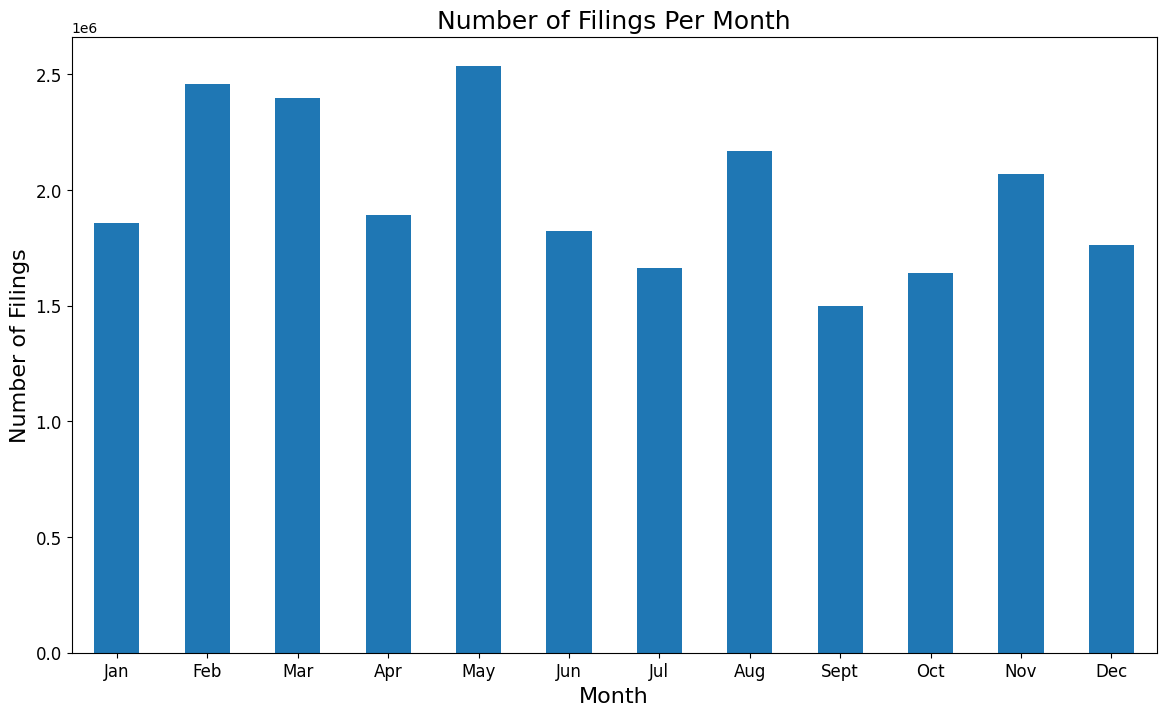

In [12]:
# Convert the 'Month_Name' column to a categorical type with a defined order
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_names.values(), ordered=True)

# Count filings per month
monthly_filings = df.groupby('Month_Name', observed=True).size()

# Sort counts in ascending order(optional, you can remove this, if you want the months to be in sequence)
#monthly_filings_sorted = monthly_filings.sort_values()

# Plotting the results
plt.figure(figsize=(14, 8))
monthly_filings.plot(kind='bar')
plt.title('Number of Filings Per Month', fontsize = 18)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Filings', fontsize = 16)
plt.xticks(rotation=0, fontsize = 12)
plt.yticks(rotation=0, fontsize = 12)
plt.show()